In [1]:
import pandas as pd

df = pd.read_csv("/Users/giovanni-lunetta/stat_4185/final/past_ten_seasons/data/cleaned.csv")

Check the boxblots for all of the variables. This displays what is expected. Most columsn have outliers on the high end which is representitive of the best players in the NBA.

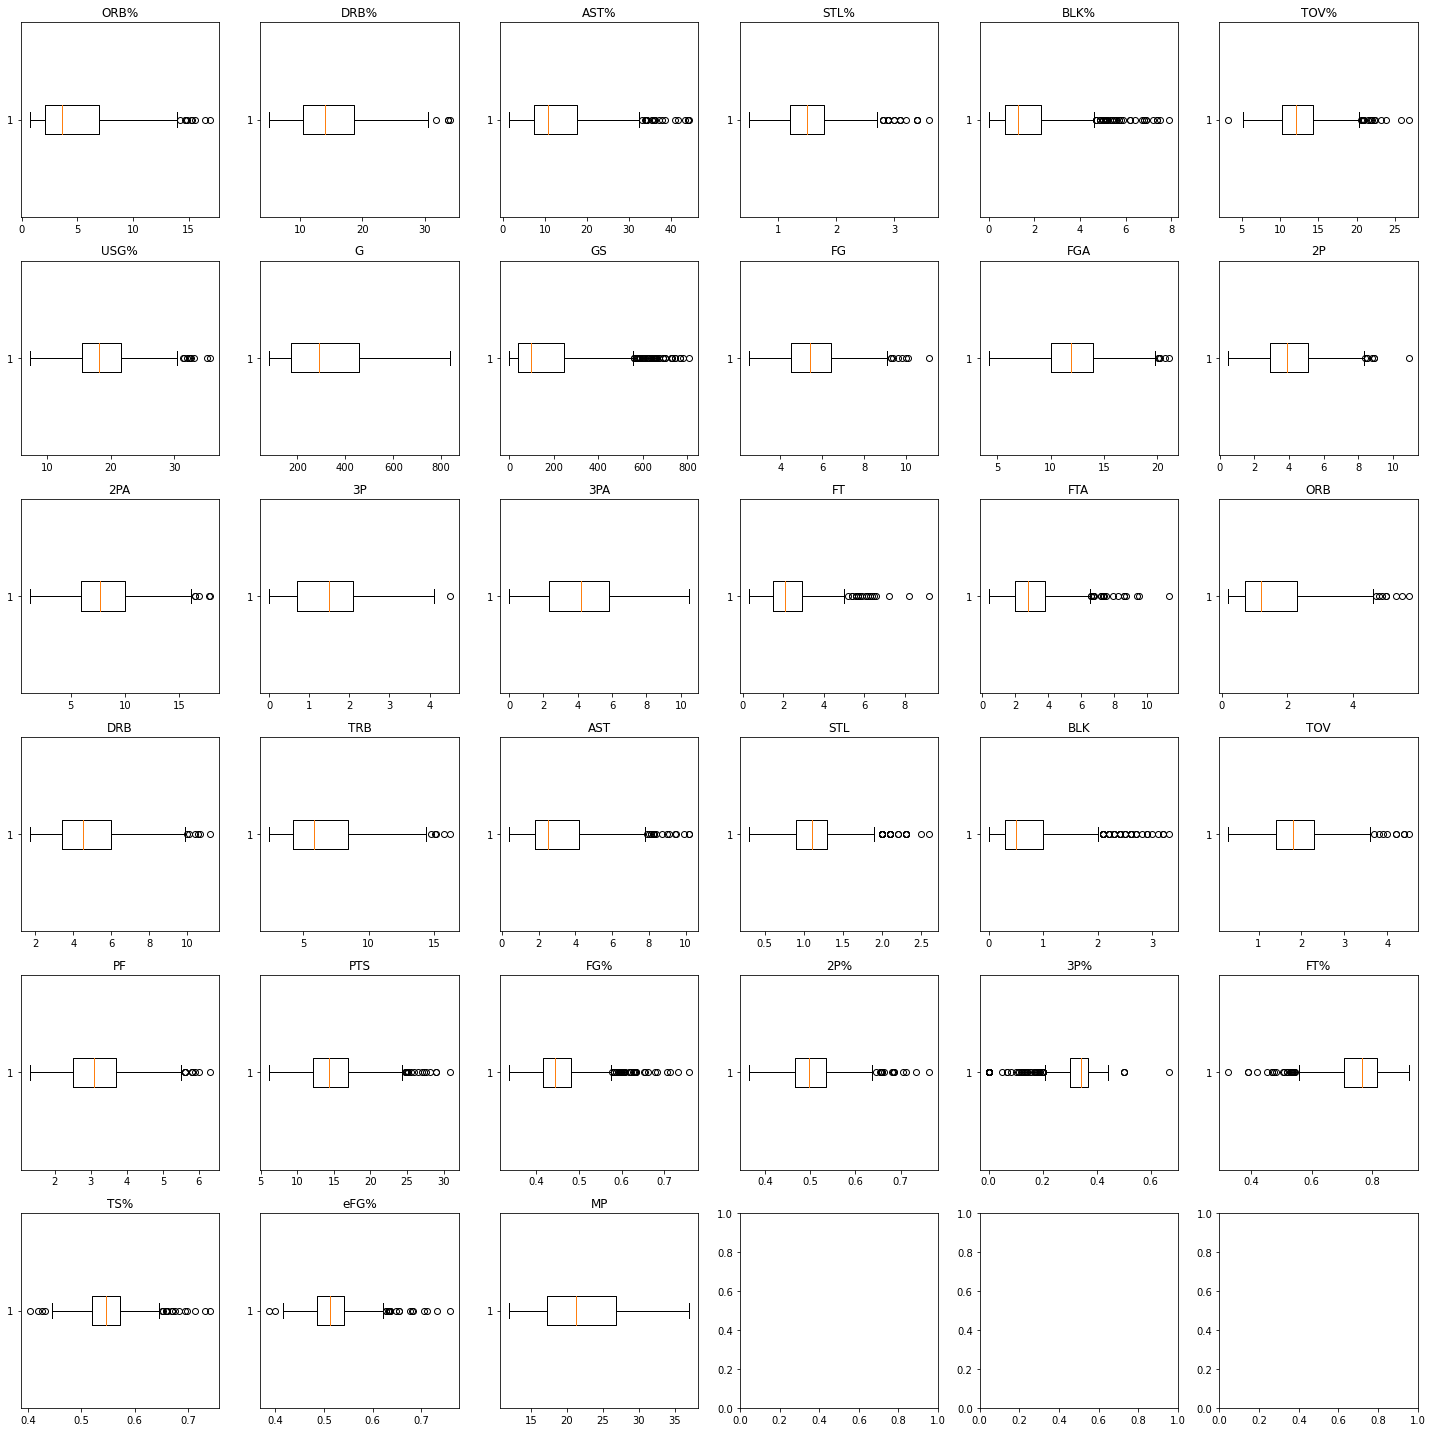

In [2]:
import matplotlib.pyplot as plt

# create a figure with multiple subplots
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(20, 20))

# create a boxplot for each continuous variable
for ax, col in zip(axes.flatten(), df.select_dtypes(include=['float64', 'int64']).columns):
    ax.boxplot(df[col], vert=False)
    ax.set_title(col)

# adjust the layout and save the figure
plt.tight_layout()
plt.show()

I also wanted to visualize each variable in comparison to Usage Rate to see if there are any relationships. As we can see, many of the raw shooting variables along with raw turnover variables seem to be linearly related to usage rate, which is expected. Then, when we look at the same variable but as a percentage, such as turnover percentage, there is no relationship. This will be better for analysis.

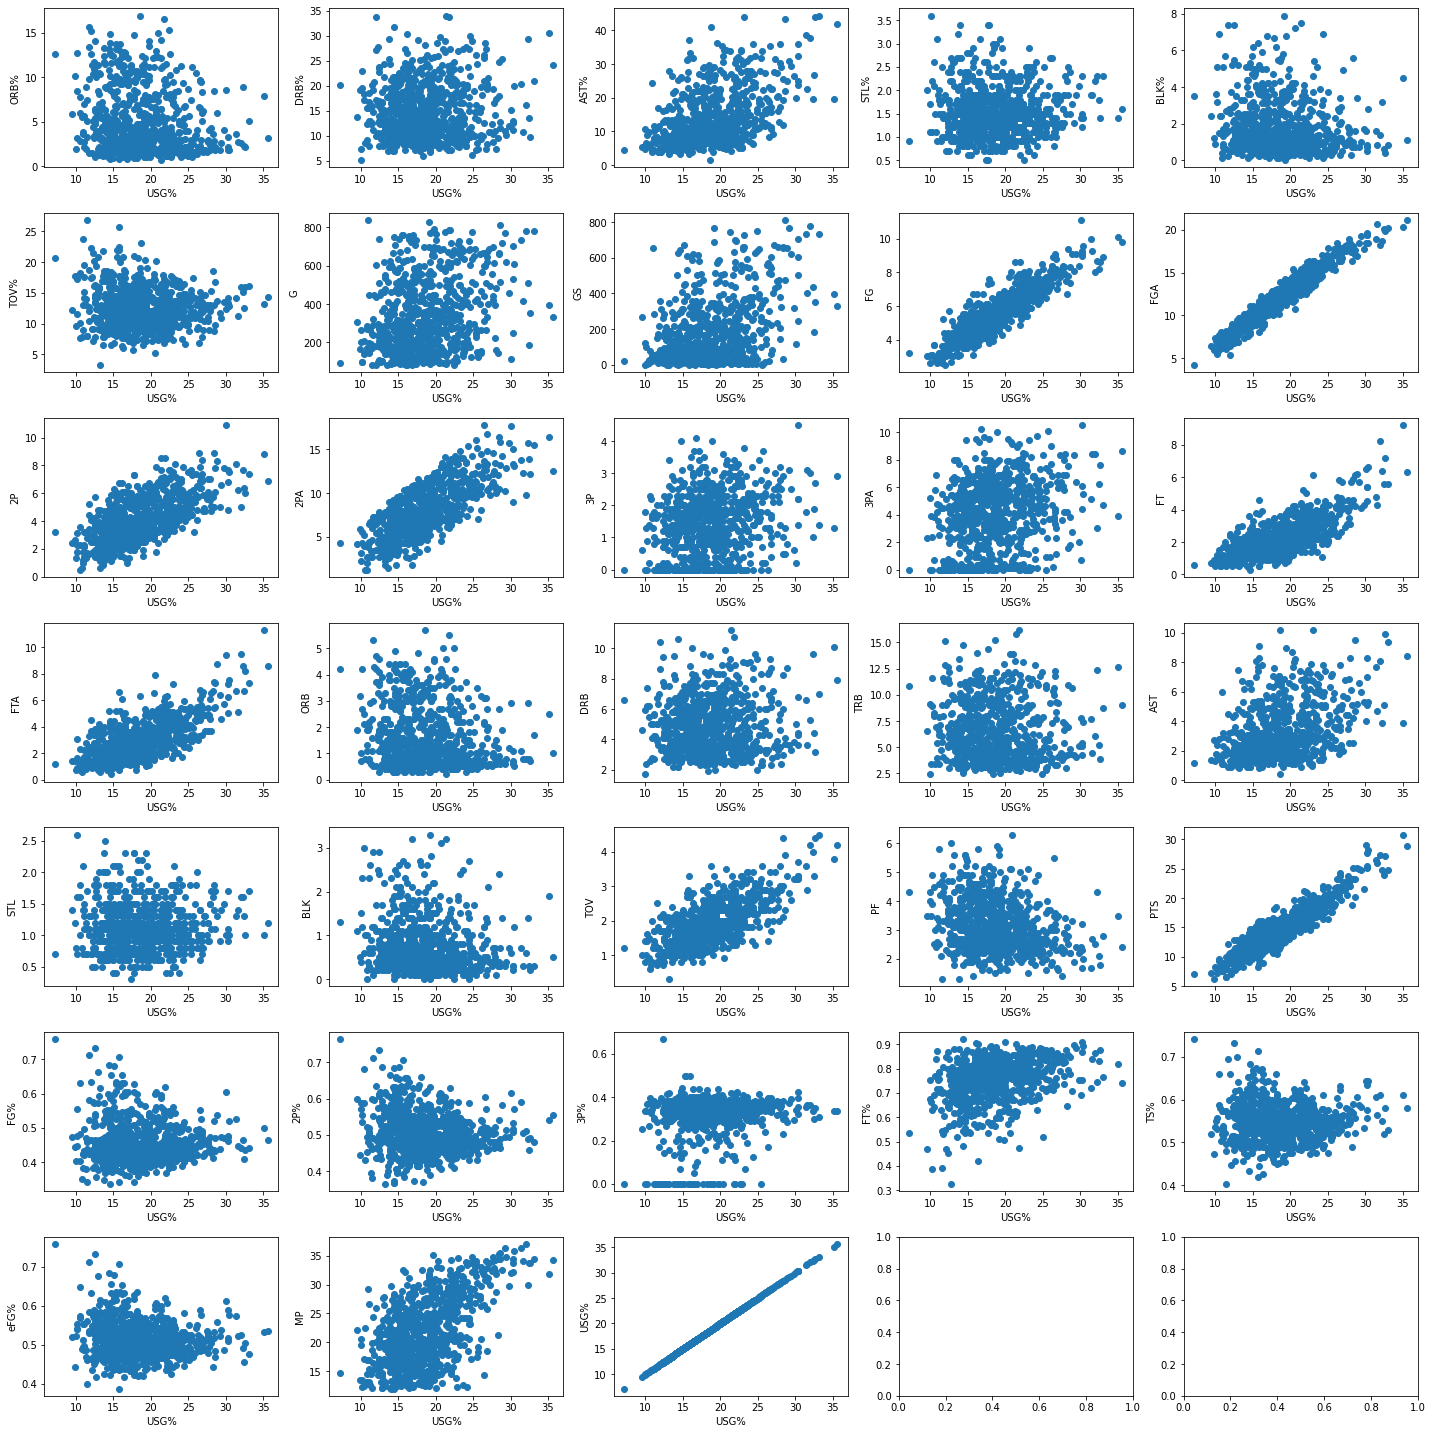

In [3]:
# select the columns to plot (all continuous variables and USG%)
cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
cols.remove('USG%')
cols.append('USG%')

# create a figure with multiple subplots
fig, axes = plt.subplots(nrows=7, ncols=5, figsize=(20, 20))

# create a scatter plot for each continuous variable in relation to USG%
for ax, col in zip(axes.flatten(), cols):
    ax.scatter(df['USG%'], df[col])
    ax.set_xlabel('USG%')
    ax.set_ylabel(col)

# adjust the layout and save the figure
plt.tight_layout()
plt.show()

Finally we can look at a correlation matrix to see which variables are correlated. As we see some have high correlations which means PCA dimension reduction will probably be helpful.

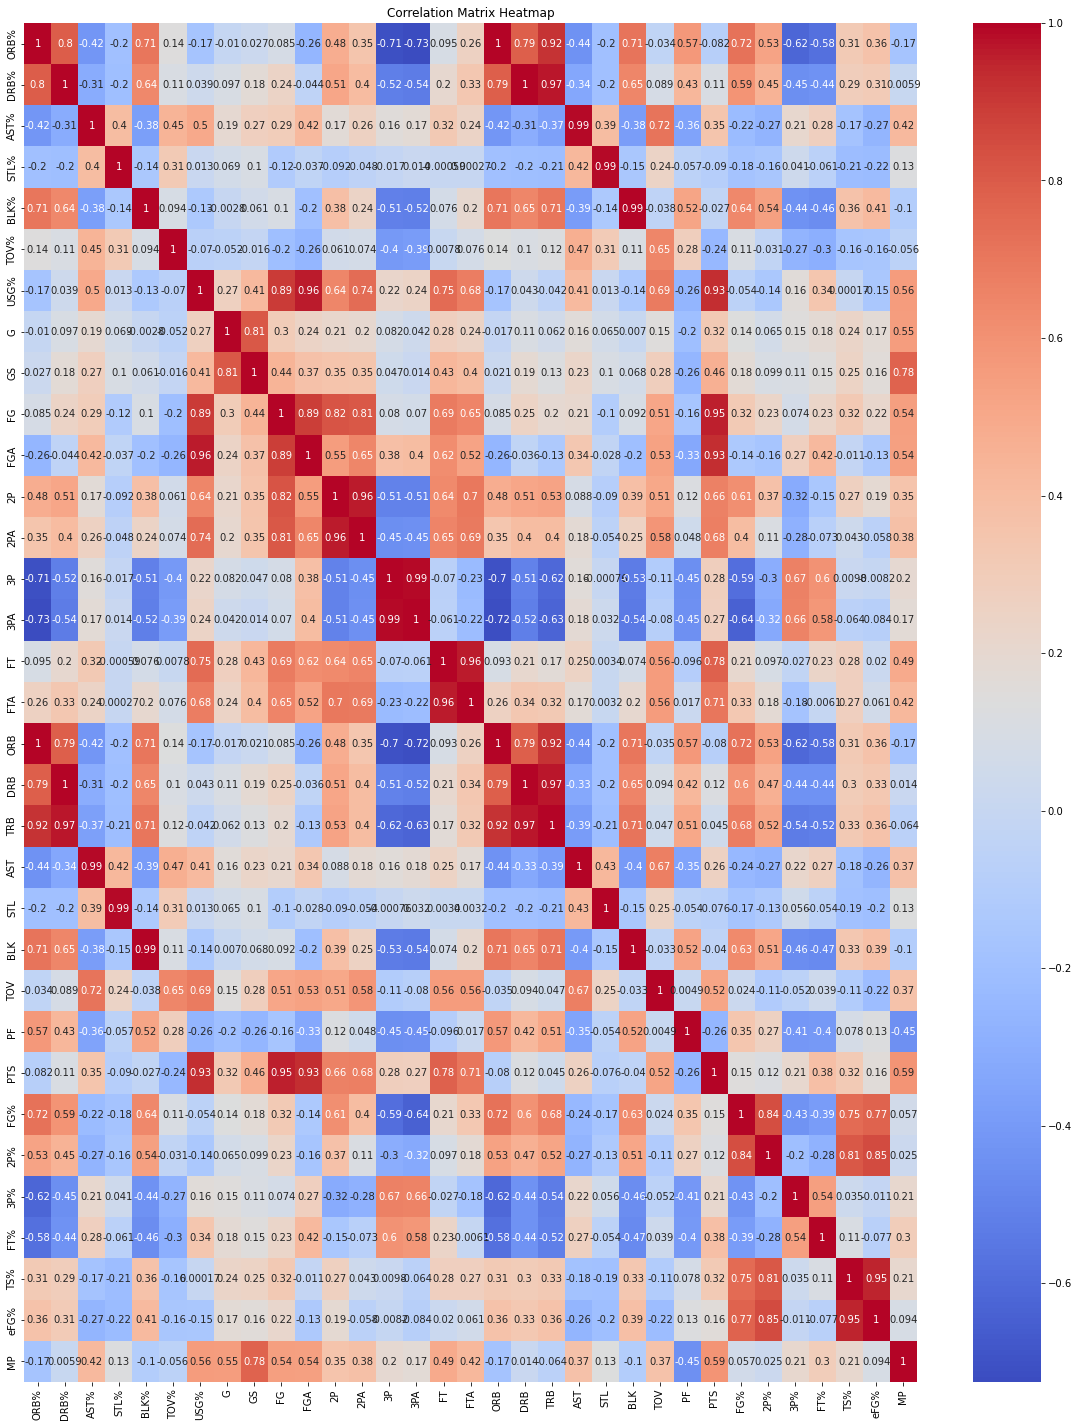

[('ORB%', 'DRB%'), ('ORB%', 'ORB'), ('ORB%', 'DRB'), ('ORB%', 'TRB'), ('DRB%', 'ORB%'), ('DRB%', 'ORB'), ('DRB%', 'DRB'), ('DRB%', 'TRB'), ('AST%', 'AST'), ('STL%', 'STL'), ('BLK%', 'BLK'), ('USG%', 'FG'), ('USG%', 'FGA'), ('USG%', 'PTS'), ('G', 'GS'), ('GS', 'G'), ('GS', 'MP'), ('FG', 'USG%'), ('FG', 'FGA'), ('FG', '2P'), ('FG', '2PA'), ('FG', 'PTS'), ('FGA', 'USG%'), ('FGA', 'FG'), ('FGA', 'PTS'), ('2P', 'FG'), ('2P', '2PA'), ('2PA', 'FG'), ('2PA', '2P'), ('3P', '3PA'), ('3PA', '3P'), ('FT', 'FTA'), ('FT', 'PTS'), ('FTA', 'FT'), ('ORB', 'ORB%'), ('ORB', 'DRB%'), ('ORB', 'DRB'), ('ORB', 'TRB'), ('DRB', 'ORB%'), ('DRB', 'DRB%'), ('DRB', 'ORB'), ('DRB', 'TRB'), ('TRB', 'ORB%'), ('TRB', 'DRB%'), ('TRB', 'ORB'), ('TRB', 'DRB'), ('AST', 'AST%'), ('STL', 'STL%'), ('BLK', 'BLK%'), ('PTS', 'USG%'), ('PTS', 'FG'), ('PTS', 'FGA'), ('PTS', 'FT'), ('FG%', '2P%'), ('FG%', 'eFG%'), ('2P%', 'FG%'), ('2P%', 'TS%'), ('2P%', 'eFG%'), ('TS%', '2P%'), ('TS%', 'eFG%'), ('eFG%', 'FG%'), ('eFG%', '2P%'), ('

In [9]:
import seaborn as sns
import numpy as np

# select only the continuous variables from the DataFrame
df_continuous = df.select_dtypes(include=[np.number])

# calculate the correlation matrix
corr_matrix = df_continuous.corr()

# create a heatmap of the correlation matrix
plt.figure(figsize=(20, 25))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()


# create a boolean mask for correlation coefficients greater than 0.75 or less than -0.75
mask = (corr_matrix > 0.75) | (corr_matrix < -0.75)

# filter the pairs of variables that meet the threshold
high_correlation_pairs = [(corr_matrix.index[i], corr_matrix.columns[j]) for i, j in zip(*np.where(mask)) if i != j]

# print the pairs of variables with high correlation
print(high_correlation_pairs)